#### Scraping and getting Stock Data
Tried scraping YahooFinance with BeautifulSoup and Requets. However, I could not get all
the data as YahooFinance is a dynamic website with some java script.

# Using YFinance Library to get stock data

##### Used the yFinance Library to get the required stock data as it was so much easier and faster.YFinance also returns the downloaded stock data in a pandas DataFrame

In [12]:
import yfinance as yf
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
plt.style.use('ggplot')

#Downloading closing price from historical stock data and the FTSE Index
yf_stock_data = yf.download("DGE.L HSBA.L RR.L BP.L BLND.L", start="2018-02-17", end="2023-02-17",
                         rounding= True)["Close"]

ftse_index = yf.download('^FTSE',start='2018-02-17',end='2023-02-17',
                         progress=False, rounding= True)

# Saving scraped data to CSV
yf_stock_data.to_csv("yf_stock_data.csv", index = True, header = True)
ftse_index.to_csv("ftse_index.csv", index = True, header = True)

[*********************100%***********************]  5 of 5 completed


# Importing Pre-Processed Stock Data
Cleaned the downloaded Yahoo finance stock data and filled empty values with excel. 
Used the mean of the previous day and the next day to fill missing values for 6 days.

In [13]:
stock_data = pd.read_csv('stock_data.csv',index_col=0,parse_dates=True)
stock_data = pd.DataFrame(stock_data)

## Examining the downloaded Stock data DataFrame

In [14]:
# Head() method shows the first 5 rows by default of our DataFrame. We can pass the number of rows as an argumument
stock_data.head()

,BLND.L,BP.L,DGE.L,HSBA.L,RR.L
Date,,,,,
2018-02-19,644.4,474.05,2494.0,760.5,284.62
2018-02-20,647.6,475.00,2493.0,737.0,288.47
2018-02-21,639.0,472.20,2496.5,747.3,289.57
2018-02-22,637.8,473.90,2467.5,728.1,288.12
2018-02-23,650.4,476.10,2477.5,723.4,287.16


In [15]:
# Tail() method shows the first 5 rows by default of our DataFrame. We can pass the number of rows as an argumument
stock_data.tail()

,BLND.L,BP.L,DGE.L,HSBA.L,RR.L
Date,,,,,
2023-02-10,450.1,560.0,3486.5,610.6,107.48
2023-02-13,452.4,557.4,3537.5,613.7,109.46
2023-02-14,447.7,560.1,3520.0,609.2,108.36
2023-02-15,446.4,559.7,3551.0,612.3,112.00
2023-02-16,448.1,567.6,3593.5,618.4,113.80


In [16]:
# The describe() method returns description of the data in the DataFrame.
stock_data.describe()

,BLND.L,BP.L,DGE.L,HSBA.L,RR.L
count,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000
mean,513.293994,420.600103,3179.673391,528.465230,178.856379
std,90.094223,107.561838,441.833519,117.437058,96.909050
min,313.800000,193.440000,2200.000000,283.350000,38.980000
25%,457.575000,315.175000,2780.125000,424.400000,95.532500
50%,518.800000,441.225000,3148.500000,525.050000,118.820000
75%,577.900000,515.675000,3567.375000,638.475000,285.722500
max,697.000000,598.300000,4103.500000,760.500000,375.430000


### Importing Sonia data and joining it to stock data DataFrame

SONIA is the risk-free rate Published by the Bank of England every business day

In [17]:
#Importing SONIA data into a DataFrame
sonia_data = pd.DataFrame(pd.read_csv('SONIA.csv',index_col=0, parse_dates=True))

In [18]:
sonia_data.head()

,SONIA
Date,
2023-02-17,3.9271
2023-02-16,3.9273
2023-02-15,3.9273
2023-02-14,3.9272
2023-02-13,3.9271


In [19]:
sonia_data.tail()

,SONIA
Date,
2018-02-23,0.4668
2018-02-22,0.4637
2018-02-21,0.4629
2018-02-20,0.4636
2018-02-19,0.4620


In [20]:
sonia_data.describe()

,SONIA
count,1263.000000
mean,0.665543
std,0.807059
min,0.039400
25%,0.054500
50%,0.690200
75%,0.709900
max,3.927300


### Merging Sonia DataFrame to StockData DataFrame
Joined the sonia data to the stock data using the date column since we have the same data for all dates

In [21]:
stock_sonia_data = pd.merge(stock_data,sonia_data, on=['Date'])
stock_sonia_data

,BLND.L,BP.L,DGE.L,HSBA.L,RR.L,SONIA
Date,,,,,,
2018-02-19,644.4,474.05,2494.0,760.5,284.62,0.4620
2018-02-20,647.6,475.00,2493.0,737.0,288.47,0.4636
2018-02-21,639.0,472.20,2496.5,747.3,289.57,0.4629
2018-02-22,637.8,473.90,2467.5,728.1,288.12,0.4637
2018-02-23,650.4,476.10,2477.5,723.4,287.16,0.4668
...,...,...,...,...,...,...
2023-02-10,450.1,560.00,3486.5,610.6,107.48,3.9270
2023-02-13,452.4,557.40,3537.5,613.7,109.46,3.9271
2023-02-14,447.7,560.10,3520.0,609.2,108.36,3.9272


## Plotting Stocks

<AxesSubplot:xlabel='Date'>

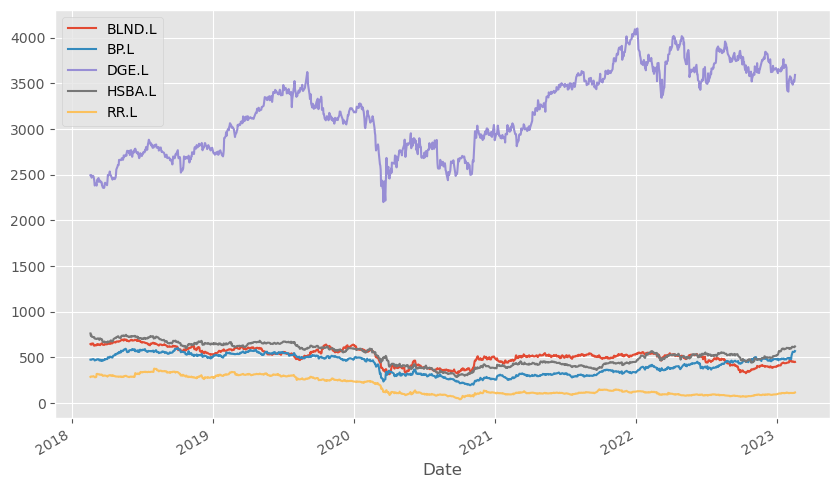

In [22]:
# Plotting stocks without the SONIA rate
stock_data.plot(figsize=(10, 6))

## Calculating Log Return for stocks and Histogram

In [23]:
log_return = np.log(stock_data[['BLND.L','BP.L','DGE.L','HSBA.L','RR.L']] / 
                    stock_data[['BLND.L','BP.L','DGE.L','HSBA.L','RR.L']].shift(1))
log_return

,BLND.L,BP.L,DGE.L,HSBA.L,RR.L
Date,,,,,
2018-02-19,NaN,NaN,NaN,NaN,NaN
2018-02-20,0.004954,0.002002,-0.000401,-0.031388,0.013436
2018-02-21,-0.013369,-0.005912,0.001403,0.013879,0.003806
2018-02-22,-0.001880,0.003594,-0.011684,-0.026028,-0.005020
2018-02-23,0.019563,0.004632,0.004044,-0.006476,-0.003338
...,...,...,...,...,...
2023-02-10,-0.011487,0.025867,-0.005720,-0.008480,-0.011471
2023-02-13,0.005097,-0.004654,0.014522,0.005064,0.018254
2023-02-14,-0.010443,0.004832,-0.004959,-0.007360,-0.010100


In [24]:
log_return.tail()

,BLND.L,BP.L,DGE.L,HSBA.L,RR.L
Date,,,,,
2023-02-10,-0.011487,0.025867,-0.005720,-0.008480,-0.011471
2023-02-13,0.005097,-0.004654,0.014522,0.005064,0.018254
2023-02-14,-0.010443,0.004832,-0.004959,-0.007360,-0.010100
2023-02-15,-0.002908,-0.000714,0.008768,0.005076,0.033040
2023-02-16,0.003801,0.014016,0.011897,0.009913,0.015944


## Log Returns Histogram of Stocks

array([[<AxesSubplot:title={'center':'BLND.L'}>,
        <AxesSubplot:title={'center':'BP.L'}>],
       [<AxesSubplot:title={'center':'DGE.L'}>,
        <AxesSubplot:title={'center':'HSBA.L'}>],
       [<AxesSubplot:title={'center':'RR.L'}>, <AxesSubplot:>]],
      dtype=object)

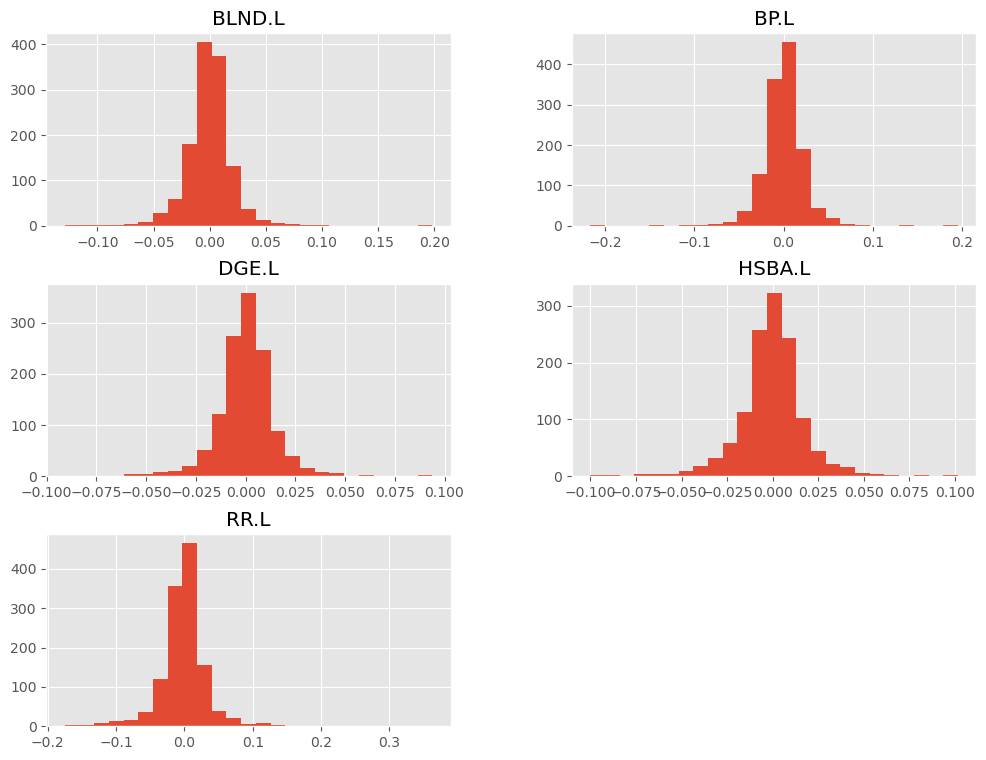

In [25]:
log_return.hist(figsize=(12, 9), bins=25)

# Calculating Stock Returns

In [26]:
stock_return = stock_data[['BLND.L','BP.L','DGE.L','HSBA.L','RR.L']] / stock_data[['BLND.L','BP.L','DGE.L','HSBA.L','RR.L']].shift(1)
stock_return

,BLND.L,BP.L,DGE.L,HSBA.L,RR.L
Date,,,,,
2018-02-19,NaN,NaN,NaN,NaN,NaN
2018-02-20,1.004966,1.002004,0.999599,0.969099,1.013527
2018-02-21,0.986720,0.994105,1.001404,1.013976,1.003813
2018-02-22,0.998122,1.003600,0.988384,0.974308,0.994993
2018-02-23,1.019755,1.004642,1.004053,0.993545,0.996668
...,...,...,...,...,...
2023-02-10,0.988579,1.026205,0.994296,0.991556,0.988595
2023-02-13,1.005110,0.995357,1.014628,1.005077,1.018422
2023-02-14,0.989611,1.004844,0.995053,0.992667,0.989951


## Stock Returns Histogram

array([[<AxesSubplot:title={'center':'BLND.L'}>,
        <AxesSubplot:title={'center':'BP.L'}>],
       [<AxesSubplot:title={'center':'DGE.L'}>,
        <AxesSubplot:title={'center':'HSBA.L'}>],
       [<AxesSubplot:title={'center':'RR.L'}>, <AxesSubplot:>]],
      dtype=object)

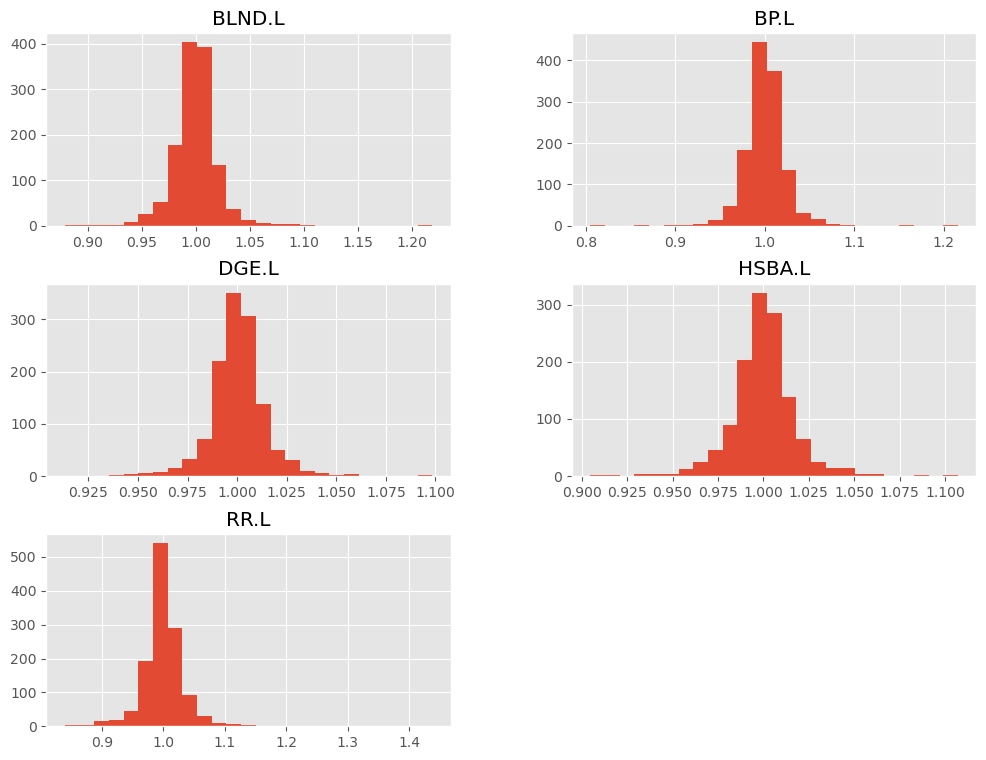

In [27]:
stock_return.hist(figsize=(12, 9), bins=25)

# Trading Strategy
### Everyday Trade Strategy

#### Price Difference
Difference in the closing prices between two consecutive days.
Negative price difference means the price on the previous day is higher than the price the current day so we purchase.
Positive price difference means the price on the current day is higher than the price the previous day so we sell.

In [28]:
#stock_data[['BLND.L','BP.L','DGE.L','HSBA.L','RR.L']]
blnd_dailydiff = stock_data[['BLND.L']].diff()
bp_dailydiff = stock_data[['BLND.L']].diff()
dge_dailydiff = stock_data[['BLND.L']].diff()
hsba_dailydiff = stock_data[['BLND.L']].diff()
rr_dailydiff = stock_data[['BLND.L']].diff()

### Trade Signal

In [29]:
blnd = stock_data[['BLND.L']]
bp =stock_data[['BP.L']]
dge = stock_data[['DGE.L']]
hsba = stock_data[['HSBA.L']]
rr = stock_data[['RR.L']]


trade_signal = 0.0
blnd['trade_signal'] = np.where(blnd_dailydiff > 0, 1.0, 0.0)
bp['trade_signal'] = np.where(bp_dailydiff > 0, 1.0, 0.0)
dge['trade_signal'] = np.where(dge_dailydiff > 0, 1.0, 0.0)
hsba['trade_signal'] = np.where(hsba_dailydiff > 0, 1.0, 0.0)
rr['trade_signal'] = np.where(rr_dailydiff > 0, 1.0, 0.0)


C:\Users\ahith\AppData\Local\Temp\ipykernel_6820\4169573840.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  blnd['trade_signal'] = np.where(blnd_dailydiff > 0, 1.0, 0.0)
C:\Users\ahith\AppData\Local\Temp\ipykernel_6820\4169573840.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bp['trade_signal'] = np.where(bp_dailydiff > 0, 1.0, 0.0)
C:\Users\ahith\AppData\Local\Temp\ipykernel_6820\4169573840.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [30]:
blnd['act'] = blnd['trade_signal'].diff()
bp['act'] = bp['trade_signal'].diff()
dge['act'] = dge['trade_signal'].diff()
hsba['act']= hsba['trade_signal'].diff()
rr['act'] = rr['trade_signal'].diff()

C:\Users\ahith\AppData\Local\Temp\ipykernel_6820\1808639501.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  blnd['act'] = blnd['trade_signal'].diff()
C:\Users\ahith\AppData\Local\Temp\ipykernel_6820\1808639501.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bp['act'] = bp['trade_signal'].diff()
C:\Users\ahith\AppData\Local\Temp\ipykernel_6820\1808639501.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

# Plotting Buy and Sell Signals

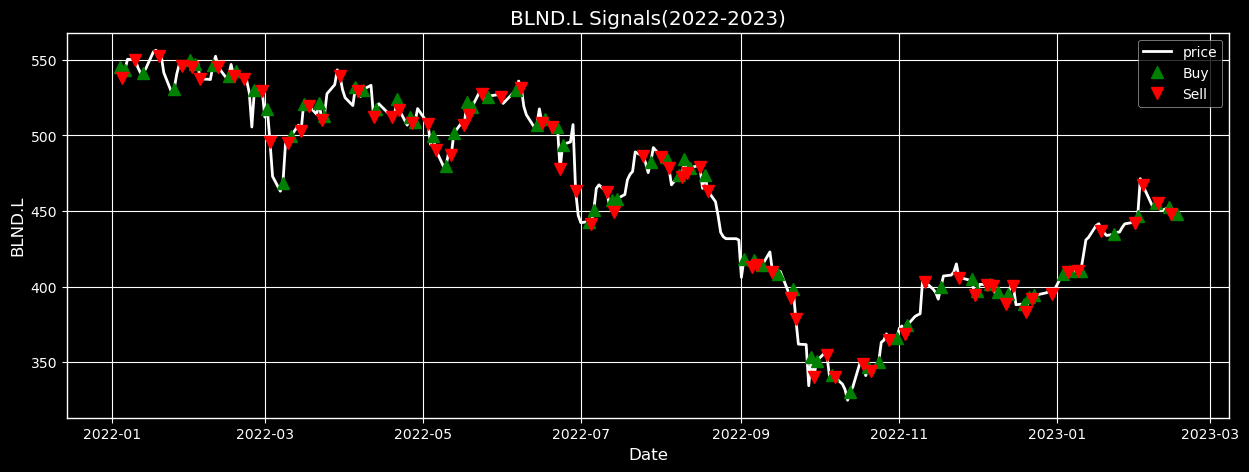

In [31]:
plt.style.use('dark_background')
blnd_plot = blnd['2022-01-01':].copy()
# Just one year or the graph will too crowded.
buys = blnd_plot.loc[blnd_plot['act'] == 1]
sells = blnd_plot.loc[blnd_plot['act'] == -1]
# Plot
fig = plt.figure(figsize=(15, 5))
plt.plot(blnd_plot.index, blnd_plot['BLND.L'], color = 'white', lw=2., label='price')
# Plot the buy and sell signals on the same plot
plt.plot(buys.index, blnd_plot.loc[buys.index]['BLND.L'], '^', markersize=8, color='g', lw=2., label='Buy')
plt.plot(sells.index, blnd_plot.loc[sells.index]['BLND.L'], 'v', markersize = 8, color='r', lw=2., label='Sell')
plt.ylabel('BLND.L')
plt.xlabel('Date')
plt.title('BLND.L Signals(2022-2023)')
plt.legend(loc=0)
plt.show()

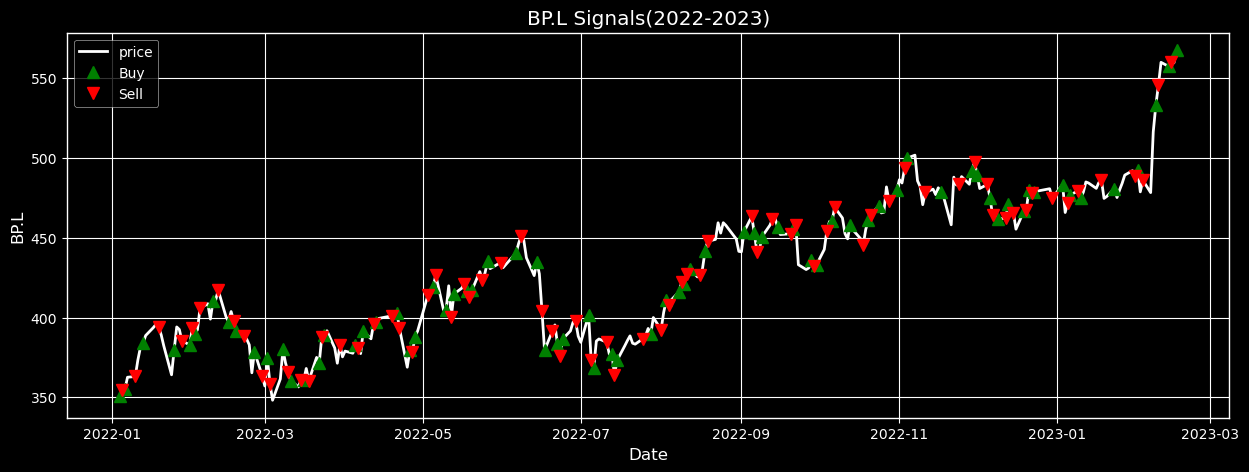

In [32]:
plt.style.use('dark_background')
bp_plot = bp['2022-01-01':].copy()
# Just one year or the graph will too crowded.
buys = bp_plot.loc[bp_plot['act'] == 1]
sells = bp_plot.loc[bp_plot['act'] == -1]
# Plot
fig = plt.figure(figsize=(15, 5))
plt.plot(bp_plot.index, bp_plot['BP.L'], color = 'white', lw=2., label='price')
# Plot the buy and sell signals on the same plot
plt.plot(buys.index, bp_plot.loc[buys.index]['BP.L'], '^', markersize=8, color='g', lw=2., label='Buy')
plt.plot(sells.index, bp_plot.loc[sells.index]['BP.L'], 'v', markersize = 8, color='r', lw=2., label='Sell')
plt.ylabel('BP.L')
plt.xlabel('Date')
plt.title('BP.L Signals(2022-2023)')
plt.legend(loc=0)
plt.show()

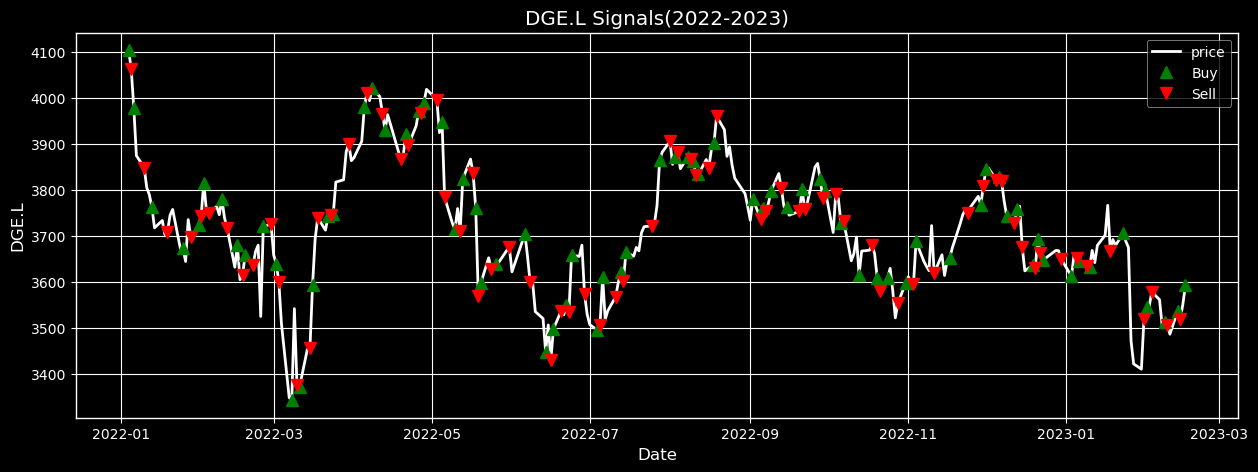

In [33]:
plt.style.use('dark_background')
dge_plot = dge['2022-01-01':].copy()
# Just one year or the graph will too crowded.
buys = dge_plot.loc[dge_plot['act'] == 1]
sells = dge_plot.loc[dge_plot['act'] == -1]
# Plot
fig = plt.figure(figsize=(15, 5))
plt.plot(dge_plot.index, dge_plot['DGE.L'], color = 'white', lw=2., label='price')
# Plot the buy and sell signals on the same plot
plt.plot(buys.index, dge_plot.loc[buys.index]['DGE.L'], '^', markersize=8, color='g', lw=2., label='Buy')
plt.plot(sells.index, dge_plot.loc[sells.index]['DGE.L'], 'v', markersize = 8, color='r', lw=2., label='Sell')
plt.ylabel('DGE.L')
plt.xlabel('Date')
plt.title('DGE.L Signals(2022-2023)')
plt.legend(loc=0)
plt.show()

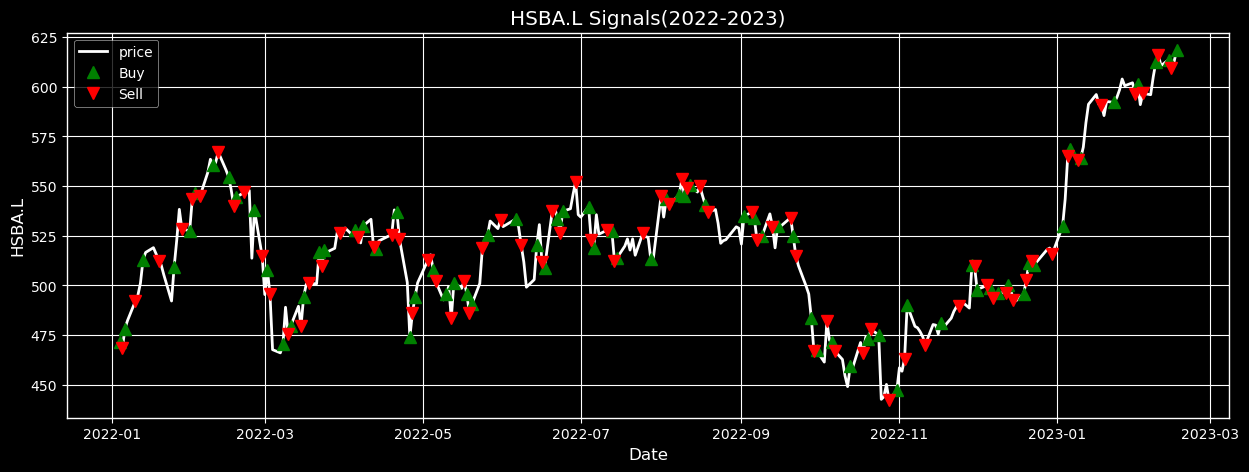

In [34]:
plt.style.use('dark_background')
hsba_plot = hsba['2022-01-01':].copy()
# Just one year or the graph will too crowded.
buys = hsba_plot.loc[hsba_plot['act'] == 1]
sells = hsba_plot.loc[hsba_plot['act'] == -1]
# Plot
fig = plt.figure(figsize=(15, 5))
plt.plot(hsba_plot.index, hsba_plot['HSBA.L'], color = 'white', lw=2., label='price')
# Plot the buy and sell signals on the same plot
plt.plot(buys.index, hsba_plot.loc[buys.index]['HSBA.L'], '^', markersize=8, color='g', lw=2., label='Buy')
plt.plot(sells.index, hsba_plot.loc[sells.index]['HSBA.L'], 'v', markersize = 8, color='r', lw=2., label='Sell')
plt.ylabel('HSBA.L')
plt.xlabel('Date')
plt.title('HSBA.L Signals(2022-2023)')
plt.legend(loc=0)
plt.show()

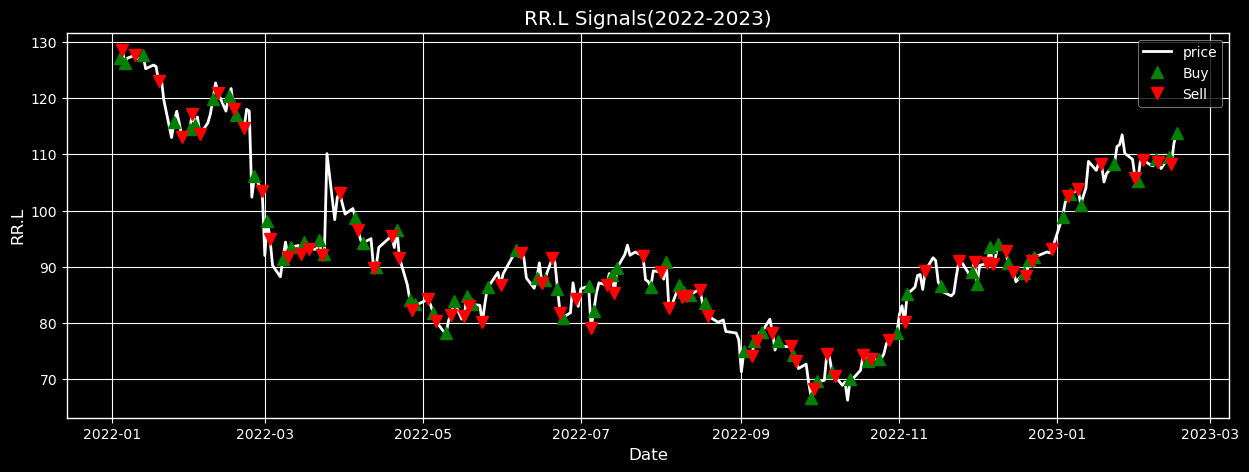

In [35]:
plt.style.use('dark_background')
rr_plot = rr['2022-01-01':].copy()
# Just one year or the graph will too crowded.
buys = rr_plot.loc[rr_plot['act'] == 1]
sells = rr_plot.loc[rr_plot['act'] == -1]
# Plot
fig = plt.figure(figsize=(15, 5))
plt.plot(rr_plot.index, rr_plot['RR.L'], color = 'white', lw=2., label='price')
# Plot the buy and sell signals on the same plot
plt.plot(buys.index, rr_plot.loc[buys.index]['RR.L'], '^', markersize=8, color='g', lw=2., label='Buy')
plt.plot(sells.index, rr_plot.loc[sells.index]['RR.L'], 'v', markersize = 8, color='r', lw=2., label='Sell')
plt.ylabel('RR.L')
plt.xlabel('Date')
plt.title('RR.L Signals(2022-2023)')
plt.legend(loc=0)
plt.show()

# Simple Moving Averages (28 days and 252 days)

### BLND SMA 28 and 252. 

In [36]:
short_window = 28
long_window = 252
trade = blnd[['BLND.L']]
trade['trade_signal'] = 0.0
trade['short_mavg'] = blnd[['BLND.L']].rolling(window=short_window).mean()
trade['long_mavg'] = blnd[['BLND.L']].rolling(window=long_window).mean()
trade['trade_signal'][short_window:] = np.where(trade['short_mavg'][short_window:] < trade['long_mavg'][short_window:], 1.0, 0.0)
trade['act'] = trade['trade_signal'].diff()
print(trade.head())
print('-'*32)
print(trade['act'].value_counts())

            BLND.L  trade_signal  short_mavg  long_mavg  act
Date                                                        
2018-02-19   644.4           0.0         NaN        NaN  NaN
2018-02-20   647.6           0.0         NaN        NaN  0.0
2018-02-21   639.0           0.0         NaN        NaN  0.0
2018-02-22   637.8           0.0         NaN        NaN  0.0
2018-02-23   650.4           0.0         NaN        NaN  0.0
--------------------------------
 0.0    1252
 1.0       5
-1.0       4
Name: act, dtype: int64


C:\Users\ahith\AppData\Local\Temp\ipykernel_6820\1545267830.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade['trade_signal'] = 0.0


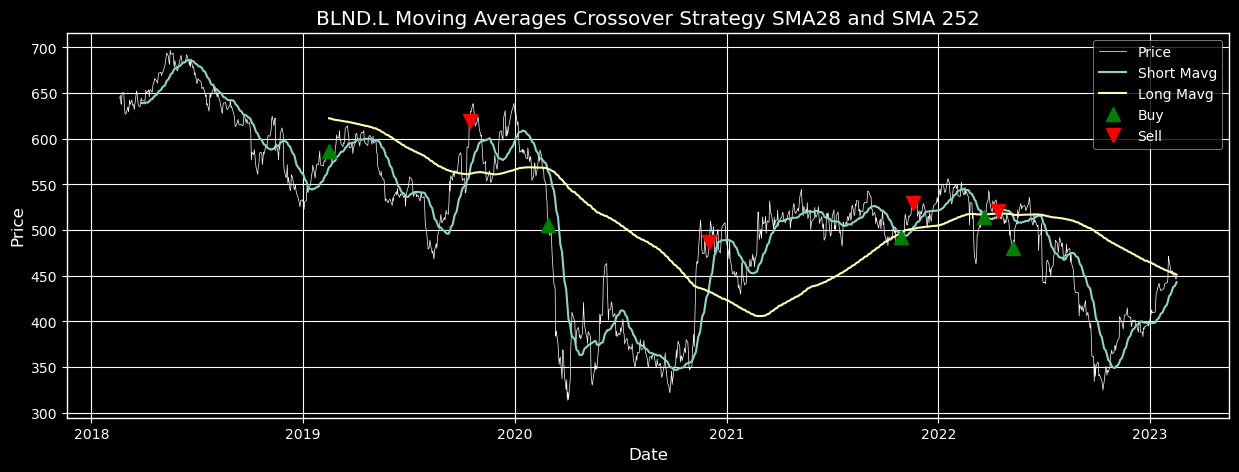

In [37]:
blnd_mavg = trade['2018-02-19':].copy()
buys = blnd_mavg.loc[blnd_mavg['act'] == 1]
sells = blnd_mavg.loc[blnd_mavg['act'] == -1]
# Plot
fig = plt.figure(figsize=(15, 5))
plt.plot(blnd_mavg.index, blnd_mavg['BLND.L'], color='white', lw=.5, label='Price')
plt.plot(blnd_mavg[['short_mavg', 'long_mavg']])
plt.plot(buys.index, blnd_mavg.loc[buys.index]['BLND.L'], '^', markersize=10, color='g', lw=2., label='Buy')
plt.plot(sells.index, blnd_mavg.loc[sells.index]['BLND.L'], 'v', markersize=10, color='red', lw=2., label='Sell')
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend(["Price","Short Mavg","Long Mavg","Buy","Sell"])
plt.title("BLND.L Moving Averages Crossover Strategy SMA28 and SMA 252")
plt.show()

## BP 

C:\Users\ahith\AppData\Local\Temp\ipykernel_6820\1936039813.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade['trade_signal'] = 0.0


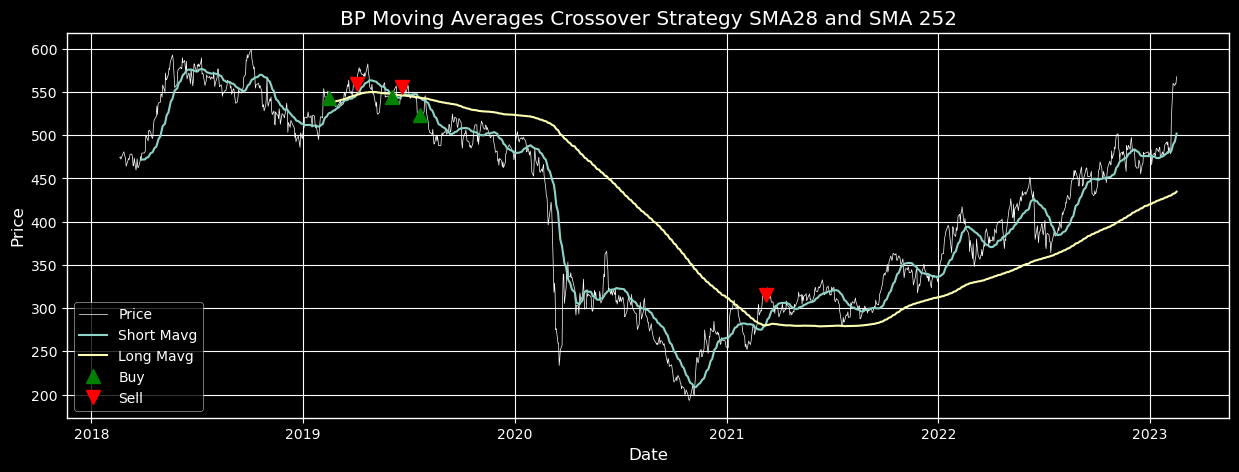

In [38]:
short_window = 28
long_window = 252
trade = bp[['BP.L']]
trade['trade_signal'] = 0.0
trade['short_mavg'] = bp[['BP.L']].rolling(window=short_window).mean()
trade['long_mavg'] = bp[['BP.L']].rolling(window=long_window).mean()
trade['trade_signal'][short_window:] = np.where(trade['short_mavg'][short_window:] < trade['long_mavg'][short_window:], 1.0, 0.0)
trade['act'] = trade['trade_signal'].diff()

bp_mavg = trade['2018-02-19':].copy()
buys = bp_mavg.loc[bp_mavg['act'] == 1]
sells = bp_mavg.loc[bp_mavg['act'] == -1]
# Plot
fig = plt.figure(figsize=(15, 5))
plt.plot(bp_mavg.index, bp_mavg['BP.L'], color='white', lw=.5, label='Price')
plt.plot(bp_mavg[['short_mavg', 'long_mavg']])
plt.plot(buys.index, bp_mavg.loc[buys.index]['BP.L'], '^', markersize=10, color='g', lw=2., label='Buy')
plt.plot(sells.index, bp_mavg.loc[sells.index]['BP.L'], 'v', markersize=10, color='red', lw=2., label='Sell')
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend(["Price","Short Mavg","Long Mavg","Buy","Sell"])
plt.title("BP Moving Averages Crossover Strategy SMA28 and SMA 252")
plt.show()

### DGE

C:\Users\ahith\AppData\Local\Temp\ipykernel_6820\3056972083.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade['trade_signal'] = 0.0


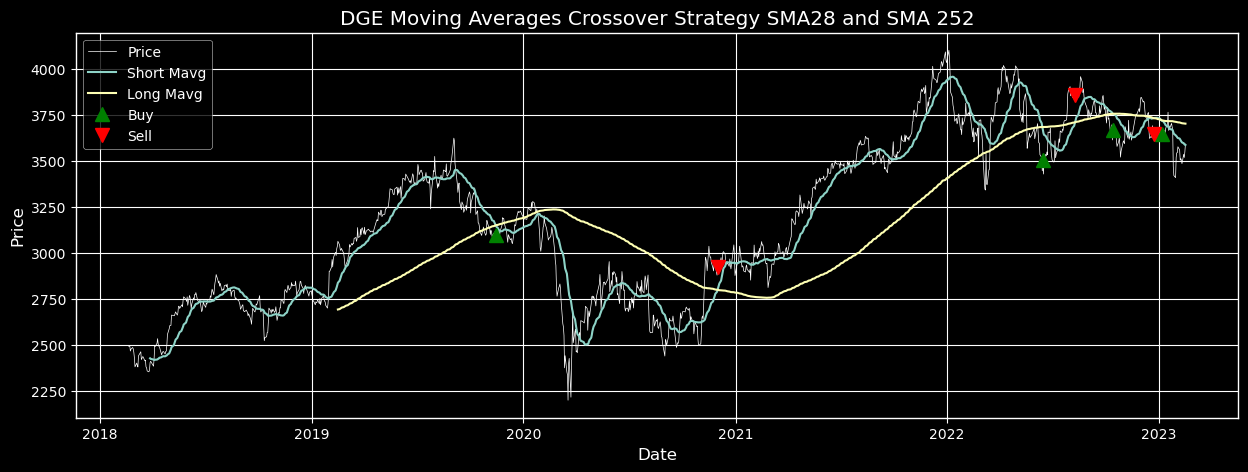

In [39]:
short_window = 28
long_window = 252
trade = dge[['DGE.L']]
trade['trade_signal'] = 0.0
trade['short_mavg'] = dge[['DGE.L']].rolling(window=short_window).mean()
trade['long_mavg'] = dge[['DGE.L']].rolling(window=long_window).mean()
trade['trade_signal'][short_window:] = np.where(trade['short_mavg'][short_window:] < trade['long_mavg'][short_window:], 1.0, 0.0)
trade['act'] = trade['trade_signal'].diff()

dge_mavg = trade['2018-02-19':].copy()
buys = dge_mavg.loc[dge_mavg['act'] == 1]
sells = dge_mavg.loc[dge_mavg['act'] == -1]
# Plot
fig = plt.figure(figsize=(15, 5))
plt.plot(dge_mavg.index, dge_mavg['DGE.L'], color='white', lw=.5, label='Price')
plt.plot(dge_mavg[['short_mavg', 'long_mavg']])
plt.plot(buys.index, dge_mavg.loc[buys.index]['DGE.L'], '^', markersize=10, color='g', lw=2., label='Buy')
plt.plot(sells.index, dge_mavg.loc[sells.index]['DGE.L'], 'v', markersize=10, color='red', lw=2., label='Sell')
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend(["Price","Short Mavg","Long Mavg","Buy","Sell"])
plt.title("DGE Moving Averages Crossover Strategy SMA28 and SMA 252")
plt.show()

### RR

C:\Users\ahith\AppData\Local\Temp\ipykernel_6820\1007793510.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade['trade_signal'] = 0.0


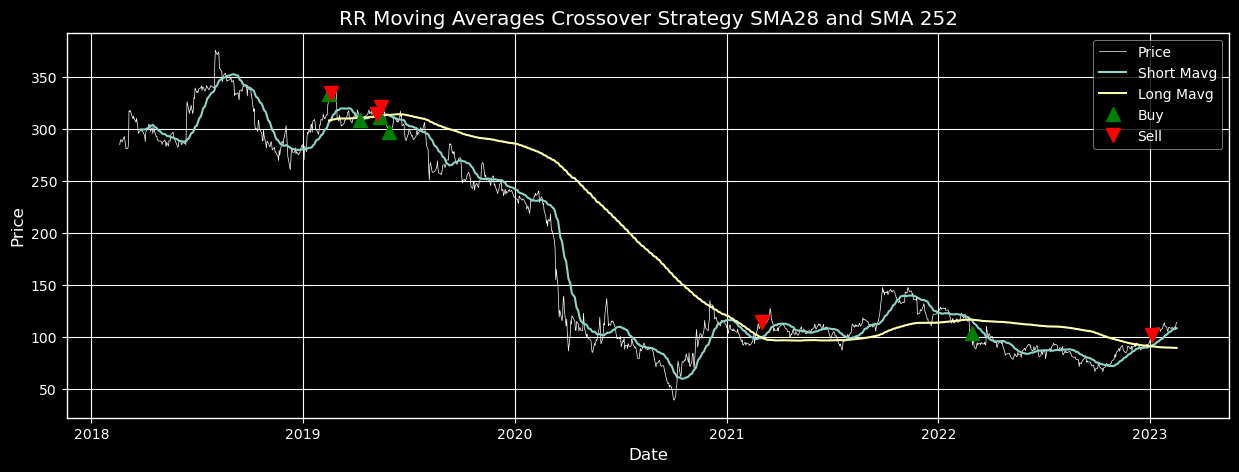

In [40]:
short_window = 28
long_window = 252
trade = rr[['RR.L']]
trade['trade_signal'] = 0.0
trade['short_mavg'] = rr[['RR.L']].rolling(window=short_window).mean()
trade['long_mavg'] = rr[['RR.L']].rolling(window=long_window).mean()
trade['trade_signal'][short_window:] = np.where(trade['short_mavg'][short_window:] < trade['long_mavg'][short_window:], 1.0, 0.0)
trade['act'] = trade['trade_signal'].diff()

rr_mavg = trade['2018-02-19':].copy()
buys = rr_mavg.loc[rr_mavg['act'] == 1]
sells = rr_mavg.loc[rr_mavg['act'] == -1]
# Plot
fig = plt.figure(figsize=(15, 5))
plt.plot(rr_mavg.index, rr_mavg['RR.L'], color='white', lw=.5, label='Price')
plt.plot(rr_mavg[['short_mavg', 'long_mavg']])
plt.plot(buys.index, rr_mavg.loc[buys.index]['RR.L'], '^', markersize=10, color='g', lw=2., label='Buy')
plt.plot(sells.index, rr_mavg.loc[sells.index]['RR.L'], 'v', markersize=10, color='red', lw=2., label='Sell')
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend(["Price","Short Mavg","Long Mavg","Buy","Sell"])
plt.title("RR Moving Averages Crossover Strategy SMA28 and SMA 252")
plt.show()

C:\Users\ahith\AppData\Local\Temp\ipykernel_6820\3021010219.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade['trade_signal'] = 0.0


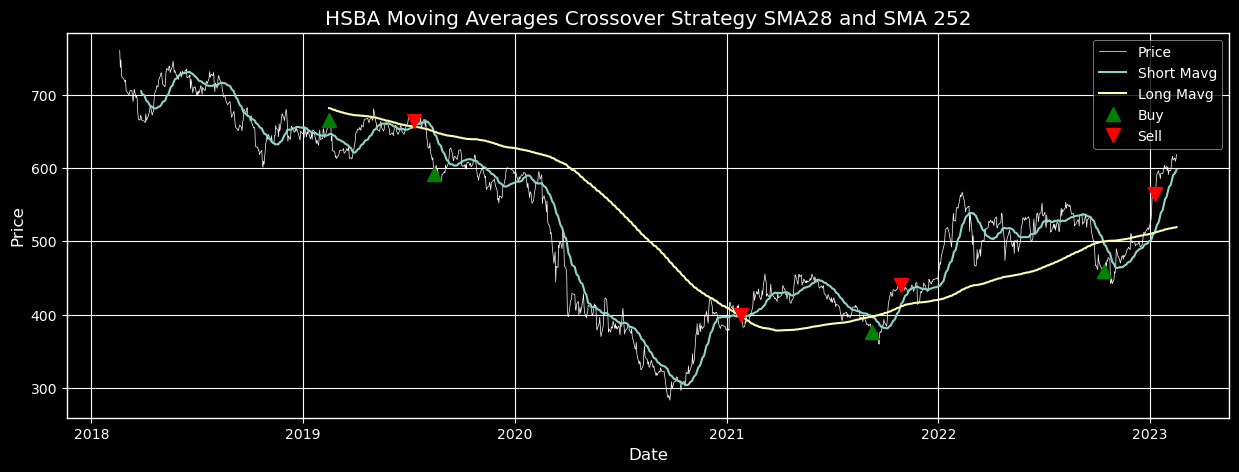

In [41]:
short_window = 28
long_window = 252
trade = hsba[['HSBA.L']]
trade['trade_signal'] = 0.0
trade['short_mavg'] = hsba[['HSBA.L']].rolling(window=short_window).mean()
trade['long_mavg'] = hsba[['HSBA.L']].rolling(window=long_window).mean()
trade['trade_signal'][short_window:] = np.where(trade['short_mavg'][short_window:] < trade['long_mavg'][short_window:], 1.0, 0.0)
trade['act'] = trade['trade_signal'].diff()

hsba_mavg = trade['2018-02-19':].copy()
buys = hsba_mavg.loc[hsba_mavg['act'] == 1]
sells = hsba_mavg.loc[hsba_mavg['act'] == -1]
# Plot
fig = plt.figure(figsize=(15, 5))
plt.plot(hsba_mavg.index, hsba_mavg['HSBA.L'], color='white', lw=.5, label='Price')
plt.plot(hsba_mavg[['short_mavg', 'long_mavg']])
plt.plot(buys.index, hsba_mavg.loc[buys.index]['HSBA.L'], '^', markersize=10, color='g', lw=2., label='Buy')
plt.plot(sells.index, hsba_mavg.loc[sells.index]['HSBA.L'], 'v', markersize=10, color='red', lw=2., label='Sell')
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend(["Price","Short Mavg","Long Mavg","Buy","Sell"])
plt.title("HSBA Moving Averages Crossover Strategy SMA28 and SMA 252")
plt.show()

# Bollinger Band Strategy

### BLND.L

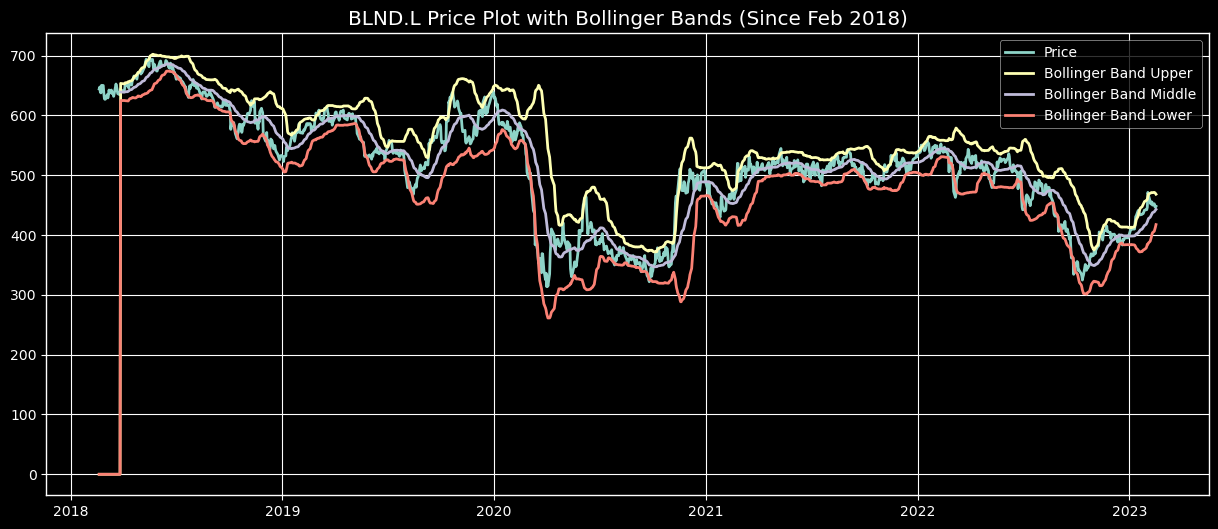

In [42]:
blnd_bbstrategy = blnd['2018-02-19':].copy()
window = 28 
no_of_std = 2
blnd_rollmean = blnd_bbstrategy['BLND.L'].rolling(window).mean() 
blnd_rollingstd = blnd_bbstrategy['BLND.L'].rolling(window).std()
blnd_bbstrategy['bbUp'] = (blnd_rollmean + (blnd_rollingstd* no_of_std)).fillna(0.0)
blnd_bbstrategy['bbMiddle'] = blnd_bbstrategy['BLND.L'].rolling(window).mean()
blnd_bbstrategy['bbLow'] = (blnd_rollmean - (blnd_rollingstd* no_of_std)).fillna(0.0)
fig = plt.figure(figsize = (15,6))
plt.plot(blnd_bbstrategy['BLND.L'], lw=2.); plt.plot(blnd_bbstrategy['bbUp'], lw=2.)
plt.plot(blnd_bbstrategy['bbMiddle'], lw=2. ); plt.plot(blnd_bbstrategy['bbLow'], lw=2.)
plt.legend(["Price","Bollinger Band Upper", "Bollinger Band Middle","Bollinger Band Lower"])
plt.title("BLND.L Price Plot with Bollinger Bands (Since Feb 2018)")
plt.show()

### Comparing Returns of Bollinger Bands Strategy to SMA

C:\Users\ahith\AppData\Local\Temp\ipykernel_6820\3273319799.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  blnd_bbstrategy['trade_position'].iloc[row] = -1
C:\Users\ahith\AppData\Local\Temp\ipykernel_6820\3273319799.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  blnd_bbstrategy['trade_position'].iloc[row] = 1


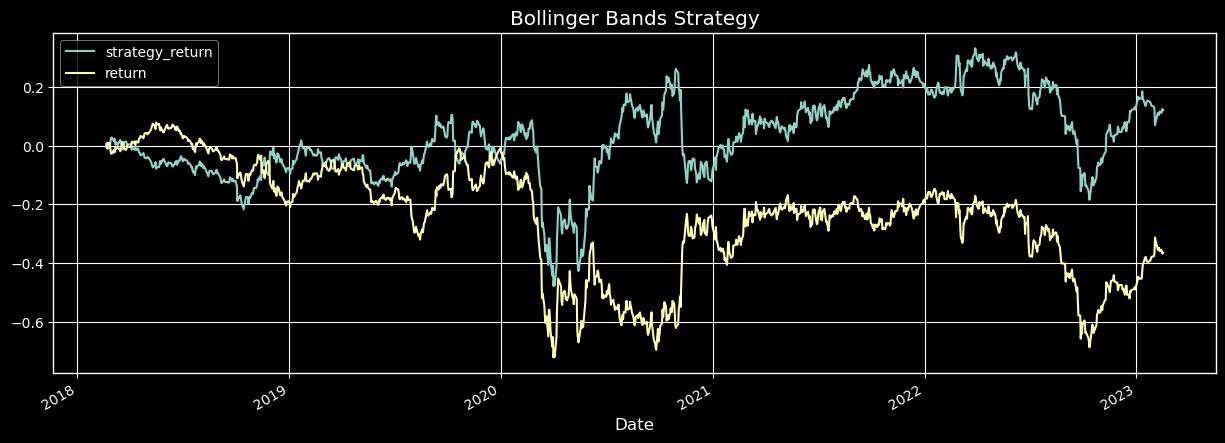

In [43]:
blnd_bbstrategy['trade_position'] = None
for row in range(len(blnd_bbstrategy)):
  if (blnd_bbstrategy['BLND.L'].iloc[row] > blnd_bbstrategy['bbUp'].iloc[row]) and (blnd_bbstrategy['BLND.L'].iloc[row-1] < blnd_bbstrategy['bbUp'].iloc[row-1]):
    blnd_bbstrategy['trade_position'].iloc[row] = -1
  if (blnd_bbstrategy['BLND.L'].iloc[row] < blnd_bbstrategy['bbLow'].iloc[row]) and (blnd_bbstrategy['BLND.L'].iloc[row-1] > blnd_bbstrategy['bbLow'].iloc[row-1]):
    blnd_bbstrategy['trade_position'].iloc[row] = 1
    
blnd_bbstrategy['trade_position'].fillna(method='ffill',inplace=True)
blnd_bbstrategy['return'] = np.log(blnd_bbstrategy['BLND.L'] / blnd_bbstrategy['BLND.L'].shift(1))
blnd_bbstrategy['strategy_return'] = blnd_bbstrategy['return'] * blnd_bbstrategy['trade_position'].shift(1)
blnd_bbstrategy[['strategy_return','return']].cumsum().plot(figsize=(15,5))
plt.title('Bollinger Bands Strategy')
plt.show()

### BP

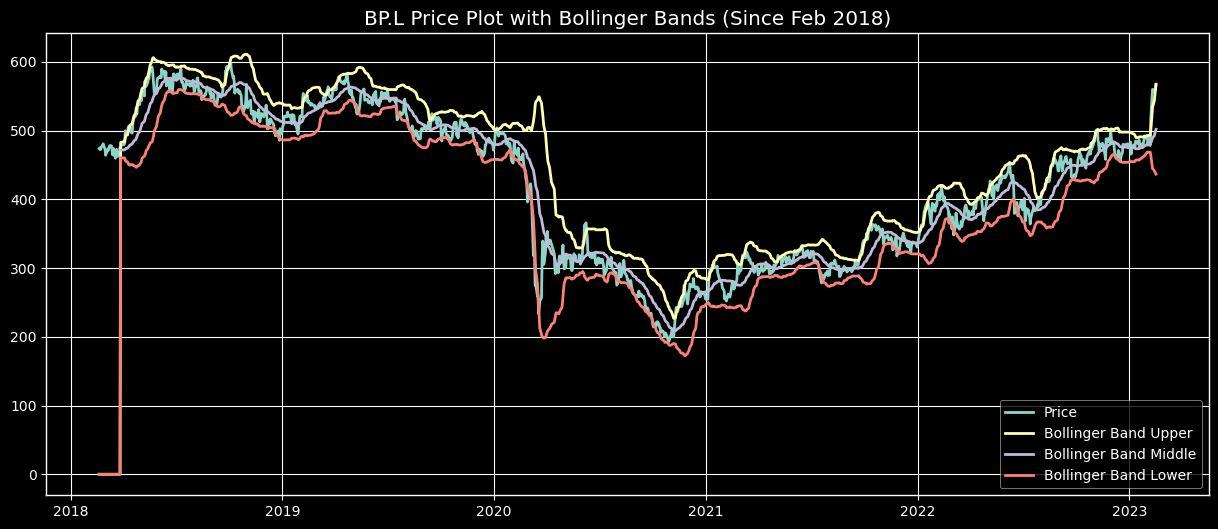

In [44]:
bp_bbstrategy = bp['2018-02-19':].copy()
window = 28 
no_of_std = 2
bp_rollmean = bp_bbstrategy['BP.L'].rolling(window).mean() 
bp_rollingstd = bp_bbstrategy['BP.L'].rolling(window).std()
bp_bbstrategy['bbUp'] = (bp_rollmean + (bp_rollingstd* no_of_std)).fillna(0.0)
bp_bbstrategy['bbMiddle'] = bp_bbstrategy['BP.L'].rolling(window).mean()
bp_bbstrategy['bbLow'] = (bp_rollmean - (bp_rollingstd* no_of_std)).fillna(0.0)
fig = plt.figure(figsize = (15,6))
plt.plot(bp_bbstrategy['BP.L'], lw=2.); plt.plot(bp_bbstrategy['bbUp'], lw=2.)
plt.plot(bp_bbstrategy['bbMiddle'], lw=2. ); plt.plot(bp_bbstrategy['bbLow'], lw=2.)
plt.legend(["Price","Bollinger Band Upper", "Bollinger Band Middle","Bollinger Band Lower"])
plt.title("BP.L Price Plot with Bollinger Bands (Since Feb 2018)")
plt.show()

### Comparing Returns of Bollinger Bands Strategy to SMA

C:\Users\ahith\AppData\Local\Temp\ipykernel_6820\2075367795.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bp_bbstrategy['trade_position'].iloc[row] = -1
C:\Users\ahith\AppData\Local\Temp\ipykernel_6820\2075367795.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bp_bbstrategy['trade_position'].iloc[row] = 1


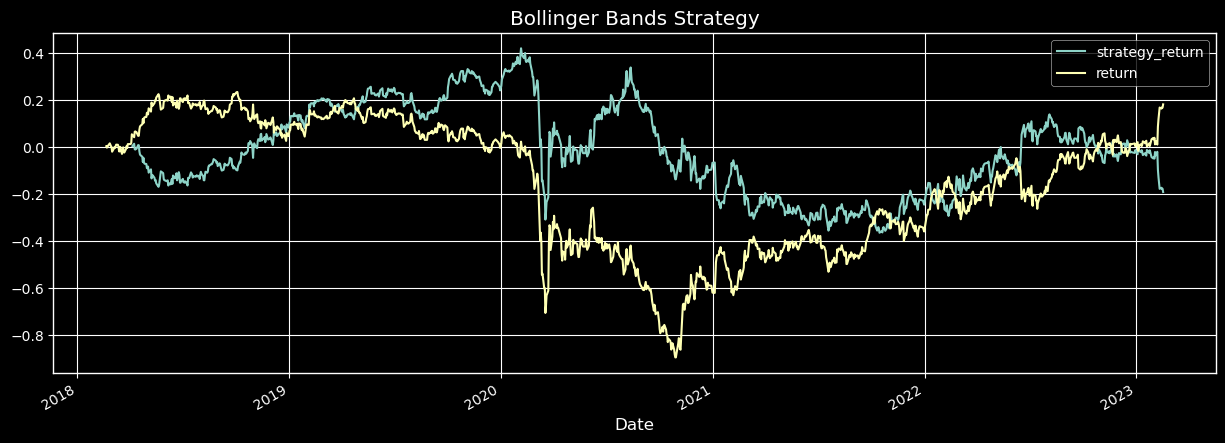

In [45]:
bp_bbstrategy['trade_position'] = None
for row in range(len(bp_bbstrategy)):
  if (bp_bbstrategy['BP.L'].iloc[row] > bp_bbstrategy['bbUp'].iloc[row]) and (bp_bbstrategy['BP.L'].iloc[row-1] < bp_bbstrategy['bbUp'].iloc[row-1]):
    bp_bbstrategy['trade_position'].iloc[row] = -1
  if (bp_bbstrategy['BP.L'].iloc[row] < bp_bbstrategy['bbLow'].iloc[row]) and (bp_bbstrategy['BP.L'].iloc[row-1] > bp_bbstrategy['bbLow'].iloc[row-1]):
    bp_bbstrategy['trade_position'].iloc[row] = 1
    
bp_bbstrategy['trade_position'].fillna(method='ffill',inplace=True)
bp_bbstrategy['return'] = np.log(bp_bbstrategy['BP.L'] / bp_bbstrategy['BP.L'].shift(1))
bp_bbstrategy['strategy_return'] = bp_bbstrategy['return'] * bp_bbstrategy['trade_position'].shift(1)
bp_bbstrategy[['strategy_return','return']].cumsum().plot(figsize=(15,5))
plt.title('Bollinger Bands Strategy')
plt.show()

### DGE

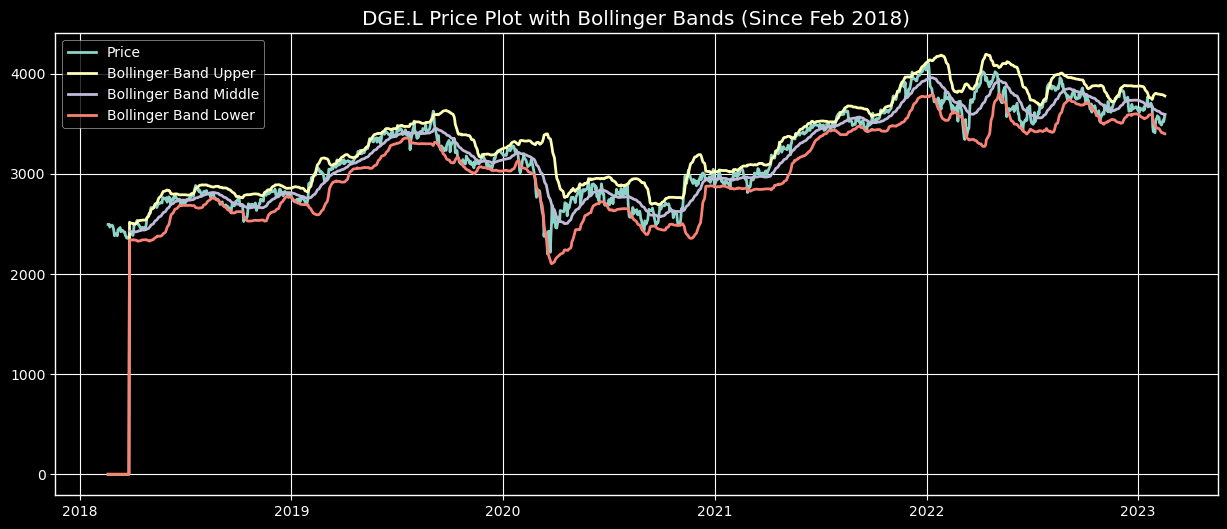

In [46]:
dge_bbstrategy = dge['2018-02-19':].copy()
window = 28 
no_of_std = 2
dge_rollmean = dge_bbstrategy['DGE.L'].rolling(window).mean() 
dge_rollingstd = dge_bbstrategy['DGE.L'].rolling(window).std()
dge_bbstrategy['bbUp'] = (dge_rollmean + (dge_rollingstd* no_of_std)).fillna(0.0)
dge_bbstrategy['bbMiddle'] = dge_bbstrategy['DGE.L'].rolling(window).mean()
dge_bbstrategy['bbLow'] = (dge_rollmean - (dge_rollingstd* no_of_std)).fillna(0.0)
fig = plt.figure(figsize = (15,6))
plt.plot(dge_bbstrategy['DGE.L'], lw=2.); plt.plot(dge_bbstrategy['bbUp'], lw=2.)
plt.plot(dge_bbstrategy['bbMiddle'], lw=2. ); plt.plot(dge_bbstrategy['bbLow'], lw=2.)
plt.legend(["Price","Bollinger Band Upper", "Bollinger Band Middle","Bollinger Band Lower"])
plt.title("DGE.L Price Plot with Bollinger Bands (Since Feb 2018)")
plt.show()

### Comparing Returns of Bollinger Bands Strategy to SMA

C:\Users\ahith\AppData\Local\Temp\ipykernel_6820\2271713654.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dge_bbstrategy['trade_position'].iloc[row] = -1
C:\Users\ahith\AppData\Local\Temp\ipykernel_6820\2271713654.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dge_bbstrategy['trade_position'].iloc[row] = 1


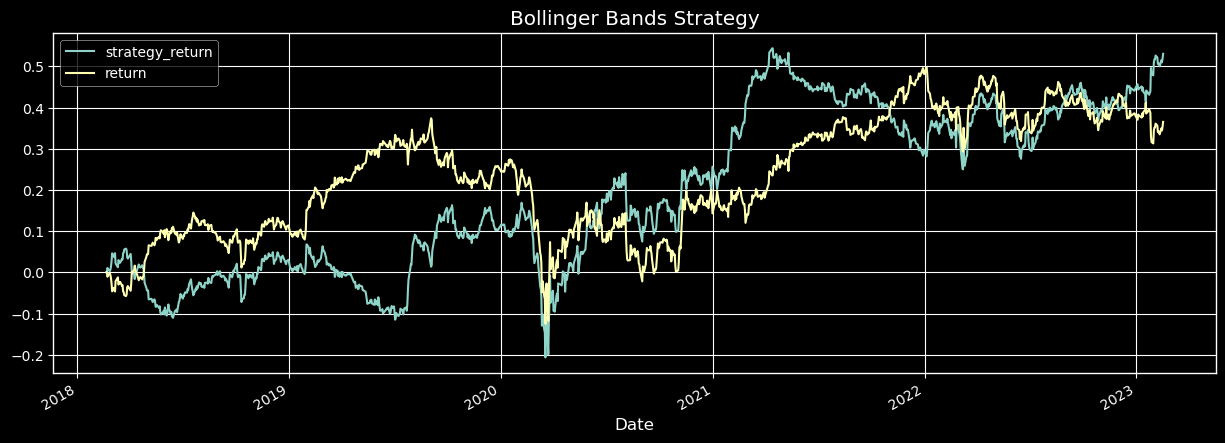

In [47]:
dge_bbstrategy['trade_position'] = None
for row in range(len(dge_bbstrategy)):
  if (dge_bbstrategy['DGE.L'].iloc[row] > dge_bbstrategy['bbUp'].iloc[row]) and (dge_bbstrategy['DGE.L'].iloc[row-1] < dge_bbstrategy['bbUp'].iloc[row-1]):
    dge_bbstrategy['trade_position'].iloc[row] = -1
  if (dge_bbstrategy['DGE.L'].iloc[row] < dge_bbstrategy['bbLow'].iloc[row]) and (dge_bbstrategy['DGE.L'].iloc[row-1] > dge_bbstrategy['bbLow'].iloc[row-1]):
    dge_bbstrategy['trade_position'].iloc[row] = 1
    
dge_bbstrategy['trade_position'].fillna(method='ffill',inplace=True)
dge_bbstrategy['return'] = np.log(dge_bbstrategy['DGE.L'] / dge_bbstrategy['DGE.L'].shift(1))
dge_bbstrategy['strategy_return'] = dge_bbstrategy['return'] * dge_bbstrategy['trade_position'].shift(1)
dge_bbstrategy[['strategy_return','return']].cumsum().plot(figsize=(15,5))
plt.title('Bollinger Bands Strategy')
plt.show()


# HSBA

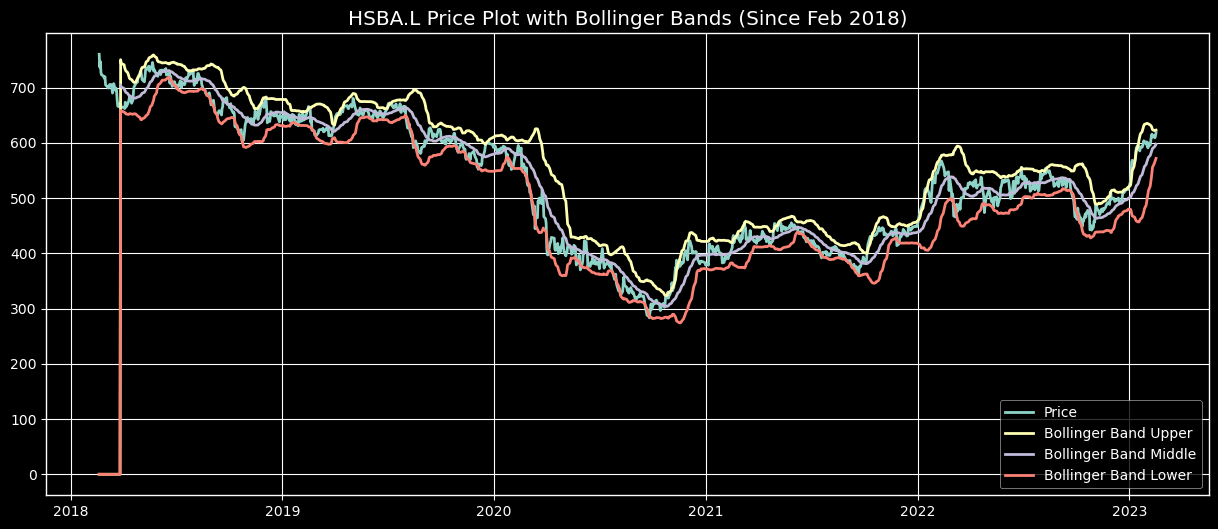

In [48]:
hsba_bbstrategy = hsba['2018-02-19':].copy()
window = 28 
no_of_std = 2
hsba_rollmean = hsba_bbstrategy['HSBA.L'].rolling(window).mean() 
hsba_rollingstd = hsba_bbstrategy['HSBA.L'].rolling(window).std()
hsba_bbstrategy['bbUp'] = (hsba_rollmean + (hsba_rollingstd* no_of_std)).fillna(0.0)
hsba_bbstrategy['bbMiddle'] = hsba_bbstrategy['HSBA.L'].rolling(window).mean()
hsba_bbstrategy['bbLow'] = (hsba_rollmean - (hsba_rollingstd* no_of_std)).fillna(0.0)
fig = plt.figure(figsize = (15,6))
plt.plot(hsba_bbstrategy['HSBA.L'], lw=2.); plt.plot(hsba_bbstrategy['bbUp'], lw=2.)
plt.plot(hsba_bbstrategy['bbMiddle'], lw=2. ); plt.plot(hsba_bbstrategy['bbLow'], lw=2.)
plt.legend(["Price","Bollinger Band Upper", "Bollinger Band Middle","Bollinger Band Lower"])
plt.title("HSBA.L Price Plot with Bollinger Bands (Since Feb 2018)")
plt.show()


### Comparing Returns of Bollinger Bands Strategy to SMA

C:\Users\ahith\AppData\Local\Temp\ipykernel_6820\3731237663.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hsba_bbstrategy['trade_position'].iloc[row] = -1
C:\Users\ahith\AppData\Local\Temp\ipykernel_6820\3731237663.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hsba_bbstrategy['trade_position'].iloc[row] = 1


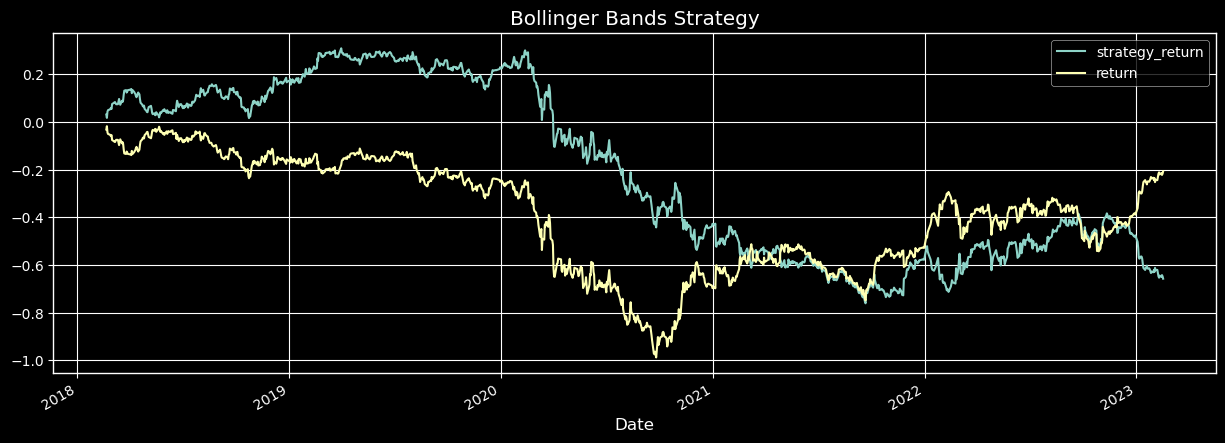

In [49]:
hsba_bbstrategy['trade_position'] = None
for row in range(len(hsba_bbstrategy)):
  if (hsba_bbstrategy['HSBA.L'].iloc[row] > hsba_bbstrategy['bbUp'].iloc[row]) and (hsba_bbstrategy['HSBA.L'].iloc[row-1] < hsba_bbstrategy['bbUp'].iloc[row-1]):
    hsba_bbstrategy['trade_position'].iloc[row] = -1
  if (hsba_bbstrategy['HSBA.L'].iloc[row] < hsba_bbstrategy['bbLow'].iloc[row]) and (hsba_bbstrategy['HSBA.L'].iloc[row-1] > hsba_bbstrategy['bbLow'].iloc[row-1]):
    hsba_bbstrategy['trade_position'].iloc[row] = 1
    
hsba_bbstrategy['trade_position'].fillna(method='ffill',inplace=True)
hsba_bbstrategy['return'] = np.log(hsba_bbstrategy['HSBA.L'] / hsba_bbstrategy['HSBA.L'].shift(1))
hsba_bbstrategy['strategy_return'] = hsba_bbstrategy['return'] * hsba_bbstrategy['trade_position'].shift(1)
hsba_bbstrategy[['strategy_return','return']].cumsum().plot(figsize=(15,5))
plt.title('Bollinger Bands Strategy')
plt.show()


### RR

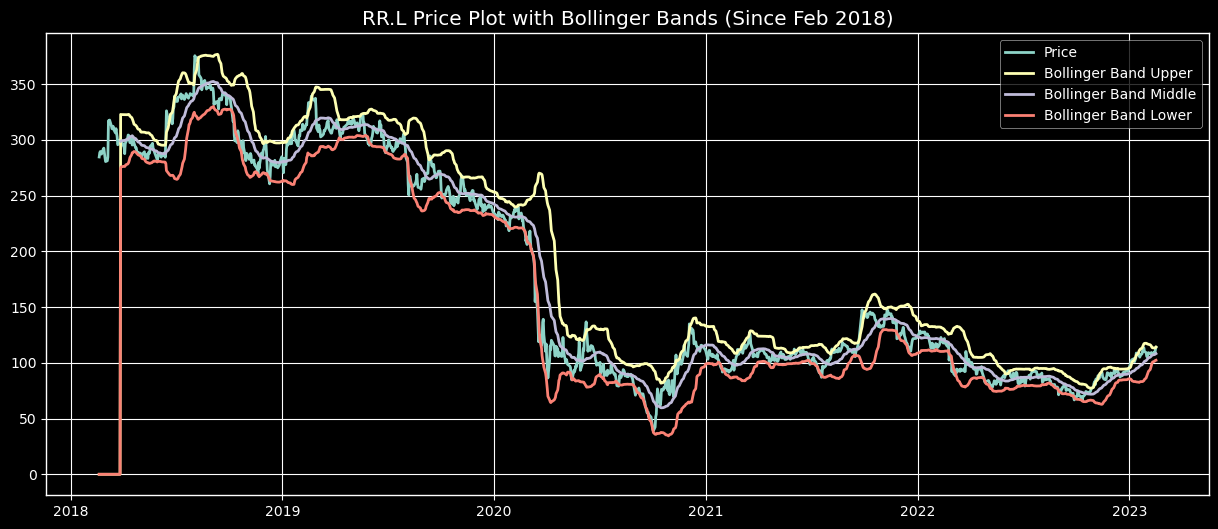

In [50]:
rr_bbstrategy = rr['2018-02-19':].copy()
window = 28 
no_of_std = 2
rr_rollmean = rr_bbstrategy['RR.L'].rolling(window).mean() 
rr_rollingstd = rr_bbstrategy['RR.L'].rolling(window).std()
rr_bbstrategy['bbUp'] = (rr_rollmean + (rr_rollingstd* no_of_std)).fillna(0.0)
rr_bbstrategy['bbMiddle'] = rr_bbstrategy['RR.L'].rolling(window).mean()
rr_bbstrategy['bbLow'] = (rr_rollmean - (rr_rollingstd* no_of_std)).fillna(0.0)
fig = plt.figure(figsize = (15,6))
plt.plot(rr_bbstrategy['RR.L'], lw=2.); plt.plot(rr_bbstrategy['bbUp'], lw=2.)
plt.plot(rr_bbstrategy['bbMiddle'], lw=2. ); plt.plot(rr_bbstrategy['bbLow'], lw=2.)
plt.legend(["Price","Bollinger Band Upper", "Bollinger Band Middle","Bollinger Band Lower"])
plt.title("RR.L Price Plot with Bollinger Bands (Since Feb 2018)")
plt.show()


### Comparing Returns of Bollinger Bands Strategy to SMA

C:\Users\ahith\AppData\Local\Temp\ipykernel_6820\882861178.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rr_bbstrategy['trade_position'].iloc[row] = -1
C:\Users\ahith\AppData\Local\Temp\ipykernel_6820\882861178.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rr_bbstrategy['trade_position'].iloc[row] = 1


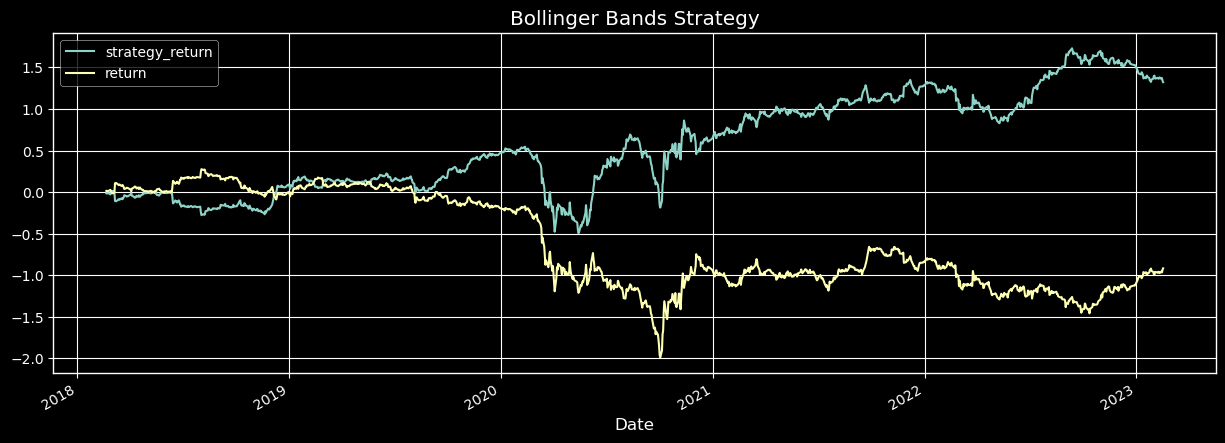

In [51]:
rr_bbstrategy['trade_position'] = None
for row in range(len(rr_bbstrategy)):
  if (rr_bbstrategy['RR.L'].iloc[row] > rr_bbstrategy['bbUp'].iloc[row]) and (rr_bbstrategy['RR.L'].iloc[row-1] < rr_bbstrategy['bbUp'].iloc[row-1]):
    rr_bbstrategy['trade_position'].iloc[row] = -1
  if (rr_bbstrategy['RR.L'].iloc[row] < rr_bbstrategy['bbLow'].iloc[row]) and (rr_bbstrategy['RR.L'].iloc[row-1] > rr_bbstrategy['bbLow'].iloc[row-1]):
    rr_bbstrategy['trade_position'].iloc[row] = 1
    
rr_bbstrategy['trade_position'].fillna(method='ffill',inplace=True)
rr_bbstrategy['return'] = np.log(rr_bbstrategy['RR.L'] / rr_bbstrategy['RR.L'].shift(1))
rr_bbstrategy['strategy_return'] = rr_bbstrategy['return'] * rr_bbstrategy['trade_position'].shift(1)
rr_bbstrategy[['strategy_return','return']].cumsum().plot(figsize=(15,5))
plt.title('Bollinger Bands Strategy')
plt.show()